# Treinamento e Implementação de Modelos Tensorflow em Larga Escala

In [1]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, PReLU, BatchNormalization, Input, Concatenate, Dropout
from tensorflow.keras.models import Sequential

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

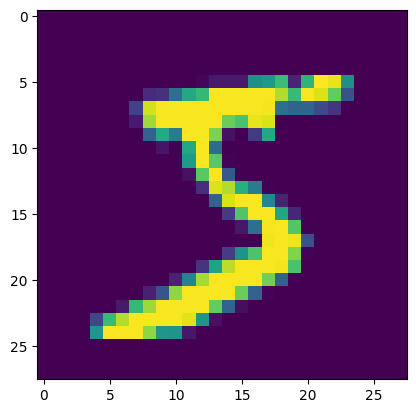

In [7]:
plt.imshow(x_train[0]);

In [8]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, kernel_initializer="he_normal"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [10]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.0001
)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_callback])

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 6.3113 - accuracy: 0.8892 - val_loss: 3.2019 - val_accuracy: 0.9232 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.9343 - accuracy: 0.9311 - val_loss: 2.1324 - val_accuracy: 0.9516 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3095 - accuracy: 0.9435 - val_loss: 1.8235 - val_accuracy: 0.9544 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9395 - accuracy: 0.9519 - val_loss: 2.5688 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8266 - accuracy: 0.9555 - val_loss: 2.6272 - val_accuracy: 0.9472 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7602 - accuracy: 0.9580 - val_loss: 2.4647 - val_accuracy: 0.9524 - lr: 0.0010
Epoch 7/10
1875/1875 [==============================] - 

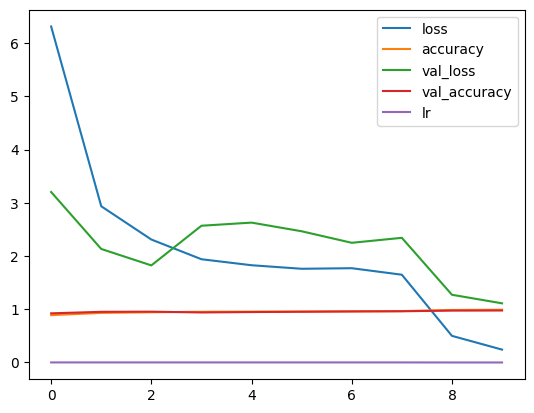

In [11]:
pd.DataFrame(history.history).plot();

## Salvando o Modelo

In [13]:
model_version = "0001"
model_name = "my_mnist_model"
model_path = os.path.join(model_name, model_version)

In [22]:
tf.saved_model.save(model, model_path)

FailedPreconditionError: my_mnist_model\0001\variables is not a directory

In [23]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [24]:
tf.config.list_physical_devices('GPU')

[]

In [25]:
tf.test.gpu_device_name()

''

In [26]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [27]:
distribuition = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [55]:
coding_size = 10

with distribuition.scope():
    inputs = Input(shape=[28, 28])
    z = Flatten()(inputs)
    z = Dense(150, activation="selu")(z)
    z = Dense(100, activation="selu")(z)
    coding_mean = Dense(10, activation="softmax")(z)
    variational_encoder = keras.models.Model(inputs=[inputs], outputs=[coding_mean])
    variational_encoder.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [56]:
batch_size = 100
history = variational_encoder.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_callback])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9209 - accuracy: 0.8798 - val_loss: 0.4919 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3167 - accuracy: 0.9343 - val_loss: 0.2955 - val_accuracy: 0.9297 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1935 - accuracy: 0.9487 - val_loss: 0.2131 - val_accuracy: 0.9458 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1562 - accuracy: 0.9572 - val_loss: 0.1814 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1459 - accuracy: 0.9604 - val_loss: 0.1679 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1327 - accuracy: 0.9634 - val_loss: 0.1447 - val_accuracy: 0.9648 - lr: 0.0010
Epoch 7/10
1875/1875 [==============================] - 6s